# CONCOURS DATA is for Good - Végétalisons la ville
### Une analyse exploratoire du jeu de données portant sur les arbres de la ville de Paris.

### Objectif
Aider la ville de Paris à s'organiser afin d'optimiser l'entretien de son parc arboricole.

### Sommaire
1. Visualisation initiale du jeu de données.
2. Analyse du dataset. Collecte d'informations. Cleaning.
3. Démarche méthodologique d’analyse de données.
4. Synthèse de l’analyse de données. Conclusions.

## 1. Visualisation initiale du jeu de données.

* Le dataset a été fourni par la ville de Paris : [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres).
* Le dataset est disponible à l'adresse suivante : [dataset au format CSV](https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B).

#### 1.1 Import du fichier csv.

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
#Visualisation de premières lignes
df=pd.read_csv('dataset_arbres.csv', sep=";")
df.head(10)

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
5  99879            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
6  99880            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
7  99881            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
8  99882            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
9  99883            Arbre      Jardin  PARIS 16E ARRDT                 NaN   

   numero                                               lieu id_emplacement  \
0     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
5     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0036   
6     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0035   
7     NaN  SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...             35   
8     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802008   
9     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802009   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   
5     Arbre à miel  Tetradium      daniellii     NaN                38   
6     Arbre à miel  Tetradium      daniellii     NaN                37   
7          Platane   Platanus    x hispanica     NaN               260   
8          Sophora    Sophora       japonica     NaN               145   
9          Sophora    Sophora       japonica     NaN               135   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289  
5          0                 NaN          NaN       48.890470        2.315228  
6          0                 NaN          NaN       48.890504        2.315168  
7         17                 NaN          NaN       48.876722        2.280222  
8         14                   A          0.0       48.871990        2.275814  
9         10                   A          0.0       48.872046        2.275752

### 1.2 Vérification de la qualité des données fournies.

**Sauvegarde du dataset**

In [115]:
data=df.copy()

**Affichage du nombre de lignes & colonnes :**

In [116]:
data.shape

(200137, 18)

**Vérification du type de données et du taux de données manquantes :**

In [117]:
#data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

Text(0, 0.5, 'Type de données')

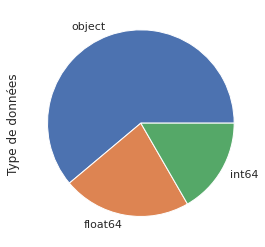

In [118]:
data.dtypes.value_counts().plot.pie()
plt.ylabel('Type de données')

**Classification de variables du dataset selon le type de données :**

In [119]:
# Liste des variables de type quantitatif
var_quantitative = data.select_dtypes(include=np.number).columns.tolist()
print("Voici les colonnes contenant les variables numériques : ",'\n',var_quantitative,'\n')

# Liste des variables de type qualitatif
var_qualitative = data.select_dtypes(exclude=np.number).columns.tolist()
print("Voici les colonnes contenant les variables catégorielles : ",'\n',var_qualitative,'\n')

Voici les colonnes contenant les variables numériques :  
 ['id', 'numero', 'circonference_cm', 'hauteur_m', 'remarquable', 'geo_point_2d_a', 'geo_point_2d_b'] 

Voici les colonnes contenant les variables catégorielles :  
 ['type_emplacement', 'domanialite', 'arrondissement', 'complement_addresse', 'lieu', 'id_emplacement', 'libelle_francais', 'genre', 'espece', 'variete', 'stade_developpement'] 



**Conclusion**

Notre dataset contient deux types variables :

* **Quantitatives** :
    * Discrètes : id, circonference_cm, hauteur_m
    * Continues : geo_point_2d_a, geo_point_2d_b


* **Qualitatives** :
    * Nominales : type_emplacement, domanialite, arrondissement, complement_addresse, numero, lieu, id_emplacement, libelle_francais, genre, espece, variete
    * Ordinales : stade_developpement, remarquable

**Distributions de variables de type float**

Observons la distribution de variables numériques :

/home/sylwia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sylwia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sylwia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/sylwia/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in 

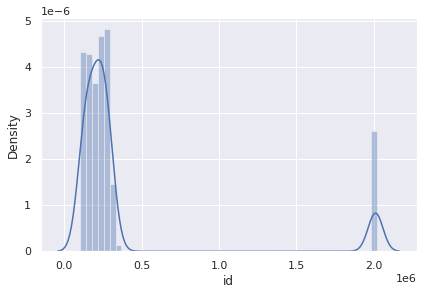

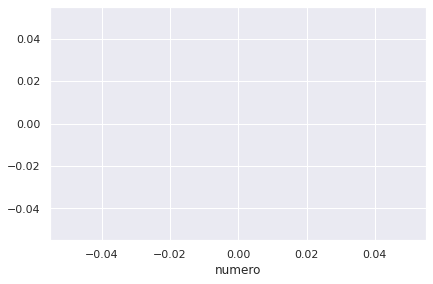

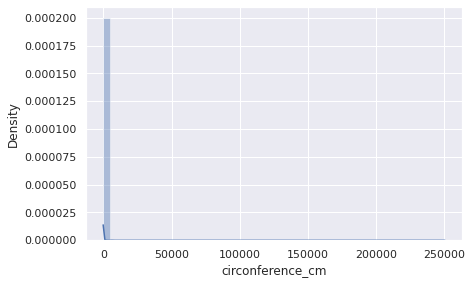

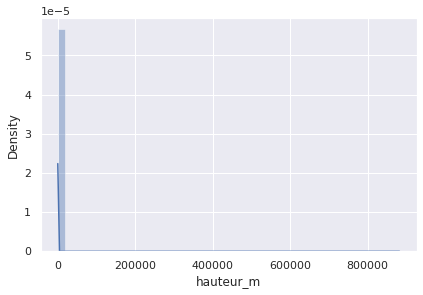

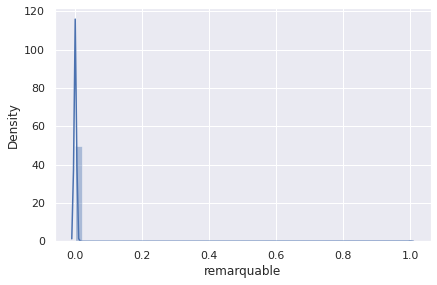

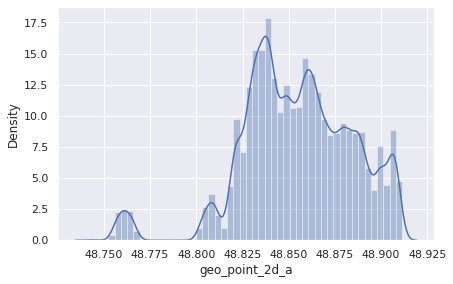

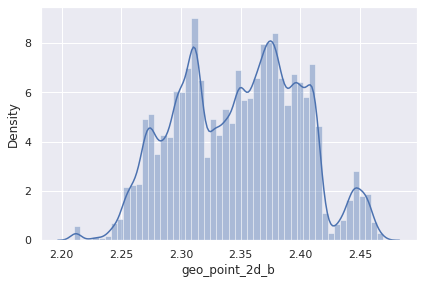

In [120]:
for col in data.select_dtypes(np.number):
    plt.figure()
    sns.distplot(data[col])

Essayons de visualiser la distribution de variables catégorielles (en se basant sur la colonne `genre`) :

Text(0, 0.5, 'Arbre')

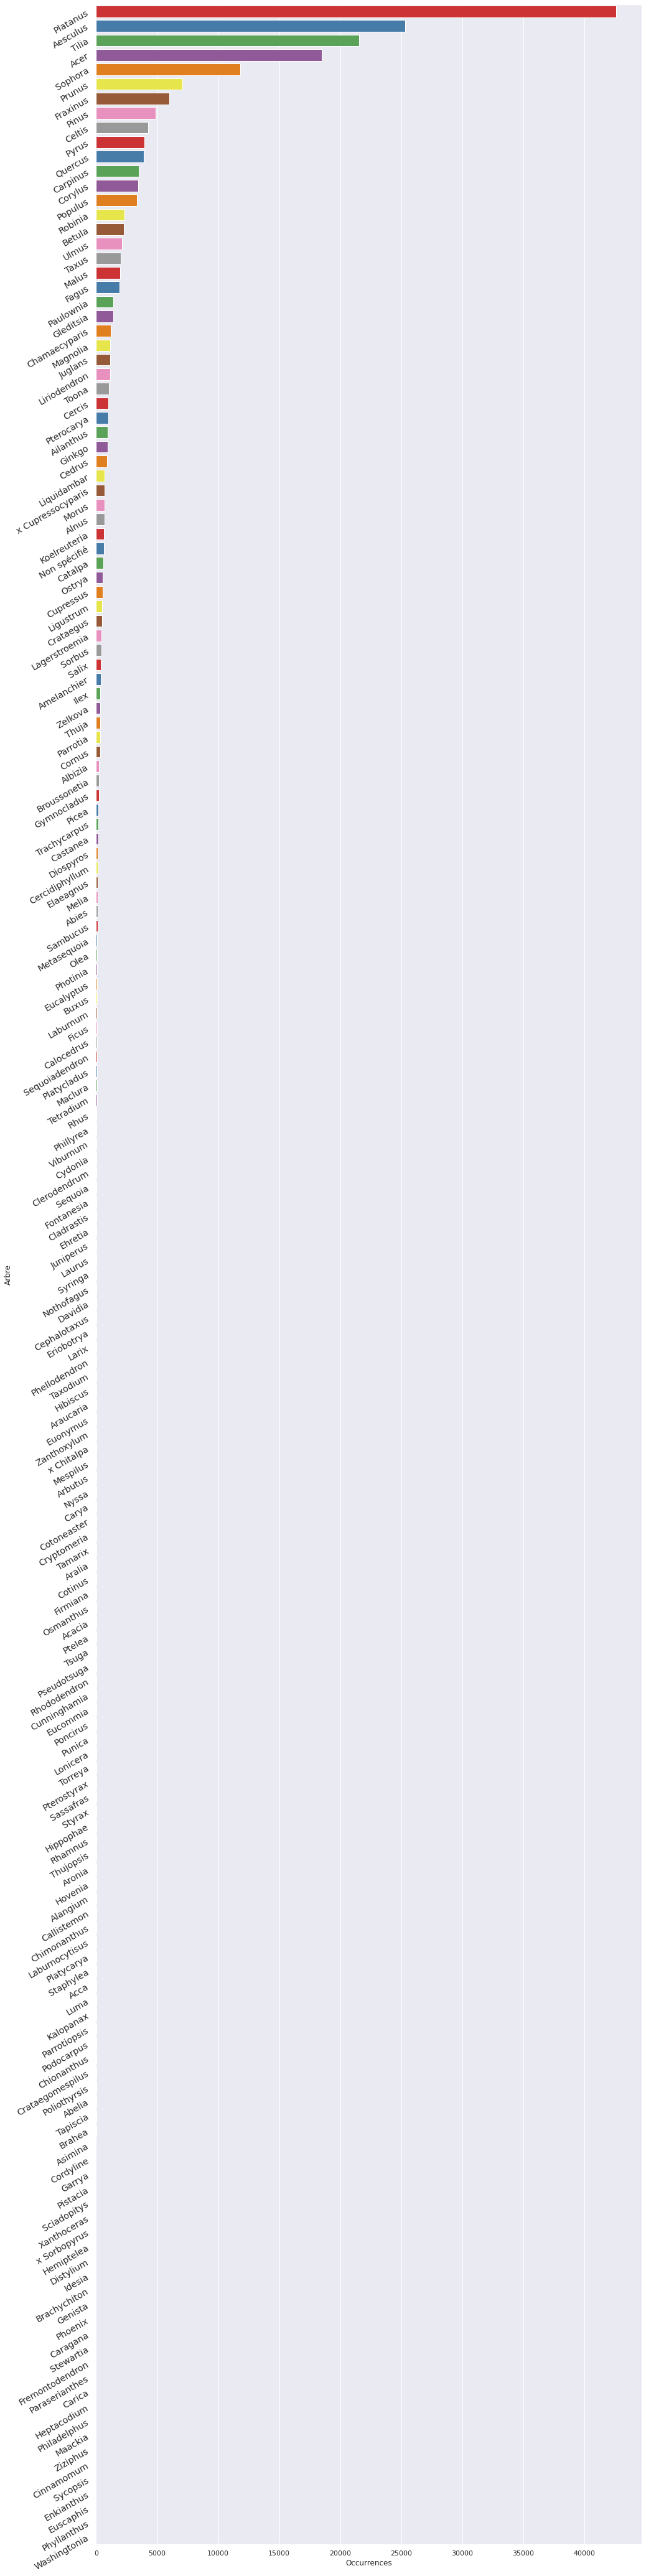

In [121]:
plt.figure(figsize=(14,70))
sns.set_theme(style="darkgrid")
g = sns.countplot(y='genre',
                    #hue='libelle_francais',
                    order=data.genre.value_counts().index,
                    data=data,
                    palette='Set1')

g.set_yticklabels(
    g.get_yticklabels(), 
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)

plt.xlabel('Occurrences')
plt.ylabel('Arbre')
#plt.legend(loc='upper right')

**Un état des lieux de données manquantes**

Nous pouvons constater que le dataset contient un nombre de valeurs manquantes. Nous allons maintenant identifier les colonnes concernées :

In [122]:
data.isna().sum().sum()

666301

Essayons de visualiser le taux de NaN par colonne :

Text(0.5, 1.0, 'Les NaN par catégorie')

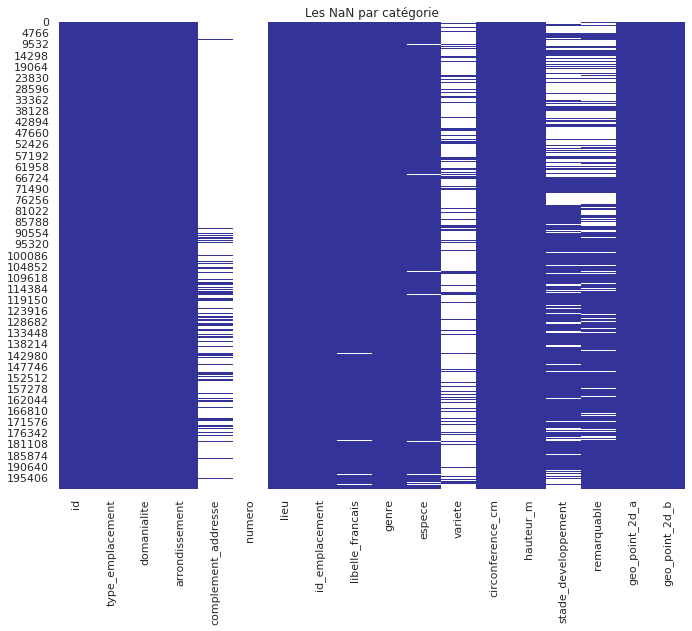

In [123]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isna(),
            #square=True, # make cells square
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='terrain', # use orange/red colour map
            #linewidth=1, # space between cells
            cbar=False)
plt.title("Les NaN par catégorie")

In [124]:
# Pourcentage de NaN
data.isna().sum()/data.shape[0]

id                     0.000000
type_emplacement       0.000000
domanialite            0.000005
arrondissement         0.000000
complement_addresse    0.845596
numero                 1.000000
lieu                   0.000000
id_emplacement         0.000000
libelle_francais       0.007480
genre                  0.000080
espece                 0.008754
variete                0.816241
circonference_cm       0.000000
hauteur_m              0.000000
stade_developpement    0.335795
remarquable            0.315274
geo_point_2d_a         0.000000
geo_point_2d_b         0.000000
dtype: float64

Nous sommes confrontés à un manque de données. Les colonnes concernées sont les suivantes :

* colonne `numero` - uniquement des N/A
* colonne `variete` - environ 80% de N/A
* colonne `complement_adresse` - environ 85% de N/A
* plus de 30% de données manquantes dans les colonnes `stade_developpement` et `remarquable`
* un léger manque de données dans les colonnes `libelle_francais` et `espece`

**Conclusion :**

Les informations apportées par les colonnes très peu renseignées seront difficilement exploitables en l’état.

**Un état des lieux des doublons**

En principe, deux arbres peuvent avoir la même taille, la même nomenclature ou la même adresse. 

En revanche, il est important que leur id ainsi que la position géographique soient uniques. 
Si un arbre possède les coordonnées de géolocalisation qui lui sont propres, il est alors logique de constater que l'arbre existe réellement.

Vérifions à présent s'il existe des doublons au niveau de l'id et des données de géolocalisation :

In [125]:
data.duplicated('id').sum()

0

In [126]:
data.duplicated('geo_point_2d_a').sum()

30

In [127]:
data.duplicated('geo_point_2d_b').sum()

23

**Conclusion** : Des données de géolocalisation existent en double.

### 1.3 Indicateurs statistiques basiques.

In [128]:
data.describe(include="all")

id type_emplacement domanialite   arrondissement  \
count   2.001370e+05           200137      200136           200137   
unique           NaN                1           9               25   
top              NaN            Arbre  Alignement  PARIS 15E ARRDT   
freq             NaN           200137      104949            17151   
mean    3.872027e+05              NaN         NaN              NaN   
std     5.456032e+05              NaN         NaN              NaN   
min     9.987400e+04              NaN         NaN              NaN   
25%     1.559270e+05              NaN         NaN              NaN   
50%     2.210780e+05              NaN         NaN              NaN   
75%     2.741020e+05              NaN         NaN              NaN   
max     2.024745e+06              NaN         NaN              NaN   

       complement_addresse  numero  \
count                30902     0.0   
unique                3795     NaN   
top                    SN°     NaN   
freq                   557     NaN   
mean                   NaN     NaN   
std                    NaN     NaN   
min                    NaN     NaN   
25%                    NaN     NaN   
50%                    NaN     NaN   
75%                    NaN     NaN   
max                    NaN     NaN   

                                               lieu id_emplacement  \
count                                        200137         200137   
unique                                         6921          69040   
top     PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         101001   
freq                                           2995           1324   
mean                                            NaN            NaN   
std                                             NaN            NaN   
min                                             NaN            NaN   
25%                                             NaN            NaN   
50%                                             NaN            NaN   
75%                                             NaN            NaN   
max                                             NaN            NaN   

       libelle_francais     genre       espece     variete  circonference_cm  \
count            198640    200121       198385       36777     200137.000000   
unique              192       175          539         436               NaN   
top             Platane  Platanus  x hispanica  Baumannii'               NaN   
freq              42508     42591        36409        4538               NaN   
mean                NaN       NaN          NaN         NaN         83.380479   
std                 NaN       NaN          NaN         NaN        673.190213   
min                 NaN       NaN          NaN         NaN          0.000000   
25%                 NaN       NaN          NaN         NaN         30.000000   
50%                 NaN       NaN          NaN         NaN         70.000000   
75%                 NaN       NaN          NaN         NaN        115.000000   
max                 NaN       NaN          NaN         NaN     250255.000000   

            hauteur_m stade_developpement    remarquable  geo_point_2d_a  \
count   200137.000000              132932  137039.000000   200137.000000   
unique            NaN                   4            NaN             NaN   
top               NaN                   A            NaN             NaN   
freq              NaN               64438            NaN             NaN   
mean        13.110509                 NaN       0.001343       48.854491   
std       1971.217387                 NaN       0.036618        0.030234   
min          0.000000                 NaN       0.000000       48.742290   
25%          5.000000                 NaN       0.000000       48.835021   
50%          8.000000                 NaN       0.000000       48.854162   
75%         12.000000                 NaN       0.000000       48.876447   
max     881818.000000                 NaN       1.000000       48.911485   

     

Une simple fonction `.describe()` fournit les informations statistiques suivantes : 

* données numériques : 
   * le nombre de valeurs non vides (count)
   * la moyenne (mean)
   * l’écart-type (std)
   * les valeurs minimale (min) et maximale (max)
   * les centiles (25%, 50% - médiane, et 75%)
    
* données catégorielles :
  * le nombre de valeurs non vides (count)
  * le nombre de valeurs différentes (unique)
  * la valeur la plus représentée (top)
  * la fréquence de la valeur la plus représentée (freq)
  
**Remarque**

Suite à l'analyse des données statistiques, nous pouvons constater que : 

1. Les colonnes suivantes contiennent une seule valeur :
- `type_emplacement` (*Arbre*)
- `numero` (*NaN*)
2. Le dataset contient un grand nombre de variables de type N/A :
- `libelle_francais` (*Non spécifié*)
- `genre` (*Non spécifié*)
- `espece` (*n. sp.*)
- `variete` (*n. sp.*)

3. Le dataset contient des données aberrantes :
* l'écart-type de la circonférence est de plus de 6m
* l'écart-type de la hauteur est proche de 2km ! 

**Conclusions** : 
* les indicateurs statistiques sont biaisés à cause de valeurs aberrantes.
* prendre une décision concernant les NaN

# 2. Analyse du dataset. Cleaning.

### 2.2.1 Méthodologie

**Les données non pertinentes pour l'analyse** :
* Les colonnes contenant une seule donnée (`numero`, `type_emplacement`).
* Les colonnes contenant des informations sans importance pour l'analyse : `id_emplacement`
* Les colonnes contenant un nombre très élevé de valeurs manquantes (`variete`,`complement_addresse`)
* Les coordonnées de géolocalisation en double.

Ces données n'apporteront pas d'informations utiles à l'analyse, elles seront enlevées du dataset.

**Les valeurs manquantes** :
* à étudier, vérifier l'impact sur l'analyse cf plus bas

**Les valeurs aberrantes** :
* à identifier et traiter en conséquence, cf plus bas

### 2.2 Suppression de données inutiles.

Suppression de colonnes entières :

In [129]:
columns = [
    "type_emplacement",
    "id_emplacement",
    "complement_addresse",
    "numero",
    "variete"]
data.drop(columns, inplace=True, axis=1)

Suppression de valeurs de géolocalisation en double :

In [130]:
data.drop_duplicates(subset=['geo_point_2d_a'],inplace=True)
data.drop_duplicates(subset=['geo_point_2d_b'],inplace=True)

In [131]:
#data.head()

### 2.2.3 Variables catégorielles vs celles numériques

Nous allons à présent procéder à une conversion de type de données suivant leur nature.

**2.2.3.1 Conversion de variables qualitatives**

**Colonne `remarquable`**

Cette catégorie classe les arbres selon leur particularités, il s'agit donc d'une description ([lien vers l'article](https://www.paris.fr/pages/l-arbre-a-paris-199#les-arbres-remarquables)). Les valeurs `0` et `1` doivent être converties respectivement en booléens `True` et `False`. Les NaN seront remplacés par un string `Non spécifié`.

In [132]:
data.remarquable.unique()

array([ 0., nan,  1.])

In [133]:
# Conversion des valeurs '0','1' en booléen 'True','False' :
data["remarquable"] = data["remarquable"].replace({
    0.0: 'False',
    1.0: 'True'
})

In [134]:
data.remarquable.unique()

array(['False', nan, 'True'], dtype=object)

In [135]:
data['remarquable'] = data['remarquable'].fillna("Non spécifié")

In [136]:
data.remarquable.unique()

array(['False', 'Non spécifié', 'True'], dtype=object)

**Remplacement de variables de type `NaN` en string `Non spécifié`**

Il est difficile de remplacer les informations manquantes lorsqu'il s'agit d'une description très précise d'un objet, comme l'adresse ou l'espèce ou encore le stade de développement. Nous allons donc les convertir tout simplement en `Non spécifié`, en attendant une mise à jour par les agents sylvicoles.

In [137]:
#Affichage de données non numériques :
var_qualitative = data.select_dtypes(exclude=np.number).columns.tolist()
var_qualitative

['domanialite',
 'arrondissement',
 'lieu',
 'libelle_francais',
 'genre',
 'espece',
 'stade_developpement',
 'remarquable']

In [138]:
# Remplacement de la donnée `NaN` en string `Non spécifié` :
for v in var_qualitative:
    if "Non spécifié" in data[v].values:
        print(f"Attention, la valeur 'Non spécifié' existe déjà dans la variable '{v}'.")    
    data[v] = data[v].fillna("Non spécifié")

Attention, la valeur 'Non spécifié' existe déjà dans la variable 'libelle_francais'.
Attention, la valeur 'Non spécifié' existe déjà dans la variable 'genre'.
Attention, la valeur 'Non spécifié' existe déjà dans la variable 'remarquable'.


In [139]:
# Remplacement de la donnée `n. sp.` en string `Non spécifié` :
for v in var_qualitative:
    if "n. sp." in data[v].values:
        print(f"La valeur 'n. sp.' existe dans la variable '{v}'")
    data[v] = data[v].replace("Non spécifié")

La valeur 'n. sp.' existe dans la variable 'espece'


**2.2.3.2 Conversion de variables quantitatives**

Les variables quantitatives, étant des NaN qui nécessitent une mise à jour par les agents sylvicoles, aucun algorithme de prédiction ne permettrait de calculer la dimension ou la localisation d'un arbre. 
Par conséquent, les NaN sont à laisser en l'état.

### 2.2.3 Circonférence & hauteur : identification de valeurs aberrantes

#### Analyse de l'impact : 

Pour la suite de l’analyse, nous allons éliminer les données aberrantes (outliers).

Il s'agit de dimensions douteuses voire fausses qui devront être renseignées à nouveau par les agents sylvicoles :
* 0cm de circonférence ou 0m de hauteur - une erreur ? un arbre détruit ?
* dimensions démesurées - une erreur ?

En attendant, nous allons enlever les enregistrements en question du dataset en les considérant comme nuls (NaN).

**Recherche des outliers via la méthode des inter-quartiles.**

Les données de taille trop éloignées de la norme - ainsi que les valeurs égales à 0 - sreont considérées comme des données aberrantes.

In [140]:
# Calcul des inter-quartiles et de l'écart
quartiles = data[['circonference_cm', 'hauteur_m']].quantile([0.25, 0.75])
q1=quartiles.loc[0.25]
q3=quartiles.loc[0.75]
iqr = q3-q1

limits = pd.DataFrame({
    'circonference_cm': [
        max(0, quartiles.loc[0.25,'circonference_cm'] - 1.5 *iqr['circonference_cm']), # min
        quartiles.loc[0.75,'circonference_cm'] + 1.5 * iqr['circonference_cm'] # max
    ], 
    'hauteur_m': [
        max(0, quartiles.loc[0.25,'hauteur_m'] - 1.5 * iqr['hauteur_m']), # min
        quartiles.loc[0.75,'hauteur_m'] + 1.5 * iqr['hauteur_m'], # max
    ]
}, index=['min', 'max'])

print("Voici les quartiles :\n", quartiles, "\n", "\n\nVoici les valeurs limites :\n", limits)

Voici les quartiles :
       circonference_cm  hauteur_m
0.25              30.0        5.0
0.75             115.0       12.0 
 

Voici les valeurs limites :
      circonference_cm  hauteur_m
min               0.0        0.0
max             242.5       22.5


Le calcul démontre que les dimensions moyennes d'un arbre est compris entre :
* 0 et 242 cm pour la circonférence
* 0 et 22 m pour la hauteur

Nous allons maintenant détecter les valeurs qui dépassent les mesures ci-dessus (outliers).

In [141]:
# Calcul des outliers :
outliers_circ = data[
(data['circonference_cm'] <= limits.loc['min','circonference_cm'])
| (data['circonference_cm'] >= limits.loc['max','circonference_cm'])]

outliers_height= data[
(data['hauteur_m'] <= limits.loc['min','hauteur_m'])
| (data['hauteur_m'] >= limits.loc['max','hauteur_m'])]
outliers_height.head()

id domanialite   arrondissement  \
4   99878      Jardin  PARIS 17E ARRDT   
5   99879      Jardin  PARIS 17E ARRDT   
6   99880      Jardin  PARIS 17E ARRDT   
11  99885      Jardin  PARIS 16E ARRDT   
12  99887      Jardin  PARIS 16E ARRDT   

                                          lieu libelle_francais      genre  \
4   PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING     Arbre à miel  Tetradium   
5   PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING     Arbre à miel  Tetradium   
6   PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING     Arbre à miel  Tetradium   
11                          JARDIN DU RANELAGH            Hêtre      Fagus   
12                          JARDIN DU RANELAGH      Micocoulier     Celtis   

          espece  circonference_cm  hauteur_m stade_developpement remarquable  \
4      daniellii                38          0                   A       False   
5      daniellii                38          0                   A       False   
6      daniellii                37          0                   A       False   
11     sylvatica                30          0                   J       False   
12  occidentalis               205          0                   J       False   

    geo_point_2d_a  geo_point_2d_b  
4        48.890435        2.315289  
5        48.890470        2.315228  
6        48.890504        2.315168  
11       48.858222        2.269287  
12       48.858212        2.268794

In [142]:
outliers_height.head(10)
outliers_height.shape

(43108, 13)

In [143]:
outliers_circ.head(10)
outliers_circ.shape

(29266, 13)

#### Concaténation des tables :

In [144]:
outliers_all = outliers_height.append(outliers_circ)
outliers_all.shape

(72374, 13)

In [145]:
outliers_all.head(20)

id domanialite   arrondissement  \
4   99878      Jardin  PARIS 17E ARRDT   
5   99879      Jardin  PARIS 17E ARRDT   
6   99880      Jardin  PARIS 17E ARRDT   
11  99885      Jardin  PARIS 16E ARRDT   
12  99887      Jardin  PARIS 16E ARRDT   
13  99888      Jardin  PARIS 16E ARRDT   
14  99889      Jardin  PARIS 16E ARRDT   
15  99890      Jardin  PARIS 16E ARRDT   
16  99891      Jardin  PARIS 16E ARRDT   
17  99892      Jardin  PARIS 16E ARRDT   
18  99893      Jardin  PARIS 16E ARRDT   
19  99894      Jardin  PARIS 16E ARRDT   
20  99895      Jardin  PARIS 16E ARRDT   
21  99896      Jardin  PARIS 16E ARRDT   
22  99897      Jardin  PARIS 16E ARRDT   
23  99898      Jardin  PARIS 16E ARRDT   
24  99899      Jardin  PARIS 16E ARRDT   
25  99900      Jardin  PARIS 16E ARRDT   
26  99901      Jardin  PARIS 16E ARRDT   
27  99902      Jardin  PARIS 16E ARRDT   

                                          lieu libelle_francais  \
4   PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING     Arbre à miel   
5   PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING     Arbre à miel   
6   PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING     Arbre à miel   
11                          JARDIN DU RANELAGH            Hêtre   
12                          JARDIN DU RANELAGH      Micocoulier   
13                          JARDIN DU RANELAGH          Tilleul   
14                          JARDIN DU RANELAGH            Chêne   
15                          JARDIN DU RANELAGH          Tilleul   
16                          JARDIN DU RANELAGH        Savonnier   
17                          JARDIN DU RANELAGH           Erable   
18                          JARDIN DU RANELAGH          Copalme   
19                          JARDIN DU RANELAGH        Savonnier   
20                          JARDIN DU RANELAGH            Noyer   
21                          JARDIN DU RANELAGH  Arbre à caramel   
22                          JARDIN DU RANELAGH           Troene   
23                          JARDIN DU RANELAGH           Troene   
24                          JARDIN DU RANELAGH           Troene   
25                          JARDIN DU RANELAGH            Hêtre   
26                          JARDIN DU RANELAGH            Hêtre   
27                          JARDIN DU RANELAGH            Hêtre   

             genre        espece  circonference_cm  hauteur_m  \
4        Tetradium     daniellii                38          0   
5        Tetradium     daniellii                38          0   
6        Tetradium     daniellii                37          0   
11           Fagus     sylvatica                30          0   
12          Celtis  occidentalis               205          0   
13           Tilia     tomentosa               155          0   
14         Quercus         robur                25          0   
15           Tilia     tomentosa               185          0   
16    Koelreuteria    paniculata                20          0   
17            Acer     rufinerve                20          0   
18     Liquidambar   styraciflua                25          0   
19    Koelreuteria    paniculata                25          0   
20         Juglans         nigra               200          0   
21  Cercidiphyllum     japonicum                20          0   
22       Ligustrum       lucidum                25          0   
23       Ligustrum       lucidum                25          0   
24       Ligustrum       lucidum                25          0   
25           Fagus     sylvatica               100          0   
26           Fagus     sylvatica                35          0   
27           Fagus     sylvatica               185          0   

   stade_developpement remarquable  geo_point_2d_a  geo_point_2d_b  
4                    A       False       48.890435        2.315289  
5                    A       False       48.890470        2.315228  
6                    A       False       48.890504        2.315168  
11                   J       False       48.858222        2.269287  
12   

Text(0.5, 1.0, 'Les outliers de la hauteur')

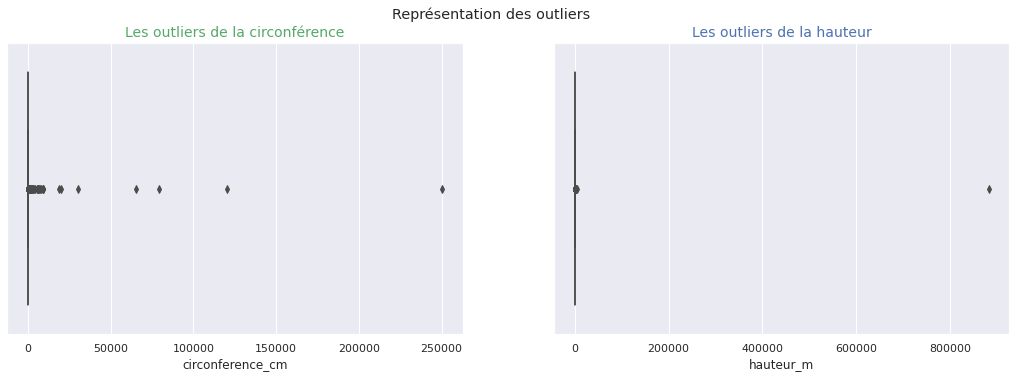

In [146]:
# Représentation graphique
fig1, axes = plt.subplots(1, 2, figsize=(16,5))
fig1.suptitle('Représentation des outliers')

sns.boxplot(ax=axes[0], x='circonference_cm', data=data, color='g')
axes[0].set_title("Les outliers de la circonférence",fontsize=14, color='g')

sns.boxplot(ax=axes[1], x='hauteur_m', data=data)
axes[1].set_title("Les outliers de la hauteur", fontsize=14, color='b')

Nous voyons que les limites ne dépassent pas les valeurs maximales que nous avons défini.
Ci-dessous une autre façon de voir la dispersion des données :

Text(0, 0.5, 'Diamètre en cm')

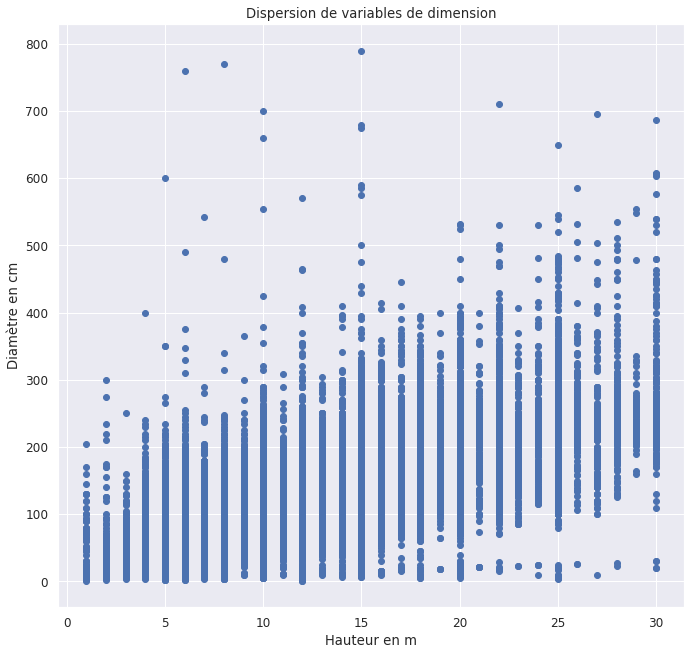

In [176]:
plt.figure(figsize=(10,10))
plt.scatter(x=data.hauteur_m,y=data.circonference_cm)
plt.title("Dispersion de variables de dimension")
plt.xlabel("Hauteur en m")
plt.ylabel("Diamètre en cm")

Voyons à présent où se trouvent les individus dont les dimensions doivent être mis à jour :

Text(0.5, 1.0, 'Circonférence à revoir (43108 au total)')

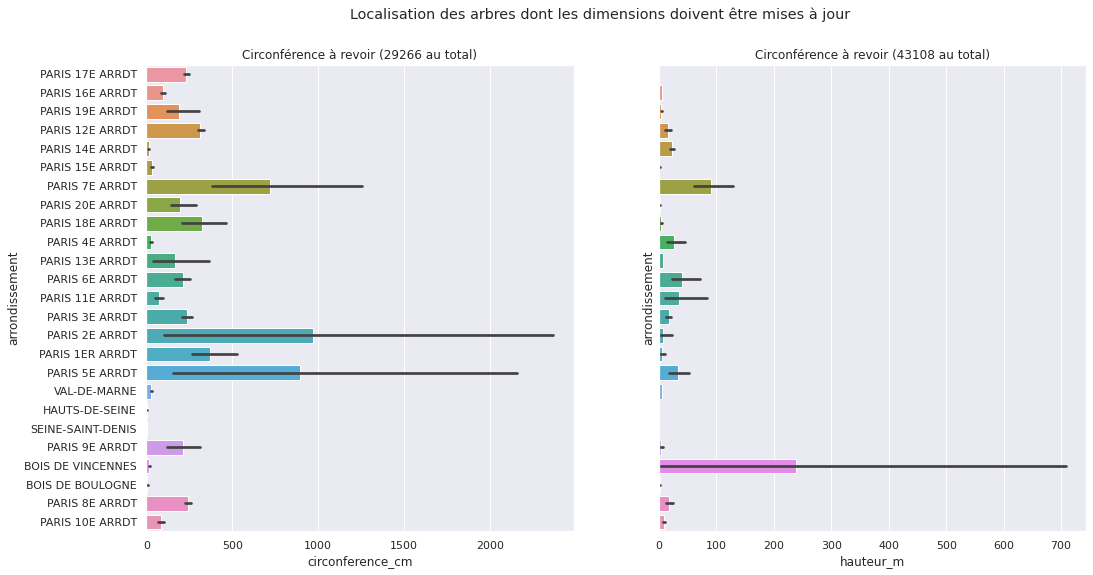

In [148]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,8))
fig.suptitle('Localisation des arbres dont les dimensions doivent être mises à jour')

# Circonférence
sns.barplot(ax=axes[0],
            data=outliers_circ,
            y="arrondissement",
            x="circonference_cm") 
            #height=15,
            #s=6)
axes[0].set_title(f"Circonférence à revoir ({len(outliers_circ)} au total)")
# Hauteur
sns.barplot(ax=axes[1],
            data=outliers_height,
            y="arrondissement",
            x="hauteur_m")
            #height=15,
            #s=6)
axes[1].set_title(f"Circonférence à revoir ({len(outliers_height)} au total)")

#### Suppression de valeurs aberrantes dans la colonne 'circonference_cm'

Selon la littérature, les valeurs maximales sont un peu différentes. Nous allons les prendre en compte dans notre analyse. Ensuite, nous allons ignorer les valeurs aberrantes.

#### [Suivant les sources](https://www.pariszigzag.fr/secret/lieux-insolites/arbres-remarquables-paris), la circonférence maximale égale 8 mètres : 
*Le platane d’Orient du Parc Monceau
Le plus gros arbre de Paris est à admirer dans l’ouest du parc Monceau, au cœur du 8ème arrondissement. Ce platane d’Orient est reconnaissable entre mille à **son énorme tronc noueux qui mesure près de 8 mètres de circonférence**, ses branches bien étalées, ainsi que sa hauteur de 30 mètres. Il a été planté ici en 1814, ce qui fait de lui un bicentenaire, mais n’est pas pour autant le plus vieux de Paris, le doyen des platanes se trouvant lui au Jardin des Plantes.*

La circonférence maximale serait donc de 800 cm :

In [149]:
circ_max_outlier =  data["circonference_cm"] > 800
#Combien de valeurs supérieures à 800
circ_max_outlier.sum()

77

Remplacement de valeurs aberrantes par des NaN (risquent de fausser nos extractions de données) :

In [150]:
circ_max=800
def check_position(check_circ):
    if check_circ > circ_max :
        print(' - "{}" n\'est pas une donnée valide, il sera remplacé par `NaN`.' \
            .format(check_circ))
        return np.NaN
    return check_circ

In [151]:
data['circonference_cm'] = data['circonference_cm'].apply(check_position)

 - "2439" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1133" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1138" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "2300" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1120" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "2196" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1140" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "900" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1150" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1120" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1000" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1140" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "18589" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1130" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1160" n'est pas une donnée valide, il sera remplacé par `N

#### Suppression de valeurs aberrantes dans la colonne 'hauteur_m'

#### [Suivant les sources](https://agriculture.gouv.fr/le-plus-grand-arbre-de-paris-veille-sur-le-78-rue-de-varenne), l'arbre le plus haut de Paris mesure 30 mètres : 
**30 mètres de haut !** *L’imposant platane du jardin de l’hôtel de Villeroy est le plus grand arbre de Paris. Un titre qui suffit a en faire le symbole du jardin du ministère en charge de l’Agriculture, aux yeux de Pierre Saccani, jardinier en charge du parc et des espaces verts. « Le plus impressionnant, c’est de savoir qu’il y a certainement autant de branches visibles que de racines sous terre », ajoute ce dernier. Un arbre profondément enraciné dans le terroir parisien, donc, mais aussi dans l’Histoire du lieu qui l’héberge.*

La hauteur maximale serait donc de 30 mètres :

In [152]:
height_max_outlier =  data["hauteur_m"] > 30
#Combien de valeurs supérieures à 30
height_max_outlier.sum()

573

Remplacement de valeurs aberrantes par des NaN (risquent de fausser nos extraits statistiques de données) :

In [153]:
hauteur_max=30
def check_position(check_hauteur):
    if check_hauteur > hauteur_max:
        print(' - "{}" n\'est pas une donnée valide, il sera remplacé par `NaN`.' \
            .format(check_hauteur))
        return np.NaN
    return check_hauteur

In [154]:
data['hauteur_m'] = data['hauteur_m'].apply(check_position)

 - "35" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "35" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "32" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "35" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "31" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "35" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "40" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "40" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "45" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "45" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "35" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "40" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "1510" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "65" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "68" n'est pas une donnée valide, il sera remplacé par `NaN`.
 - "31" n'est pas une d

#### 2.2.4 Suppression de valeurs nulles. Vérification de l'existence des valeurs négatives : 

In [155]:
zero=0
                  
def check_position(check_chiffre):
    if check_chiffre <= zero:
        print(' - "{}" est une donnée fausse et sera remplacée par `NaN`.' \
            .format(check_chiffre))
        return np.NaN
    return check_chiffre

In [156]:
data['hauteur_m'] = data['hauteur_m'].apply(check_position)
data['circonference_cm'] = data['circonference_cm'].apply(check_position)

 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera remplacée par `NaN`.
 - "0.0" est une donnée fausse et sera r

Remarque: pas de valeurs négatives dans les colonnes `hauteur_m` et `circonfrence_cm`.

## 2.3 Vérification finale de la qualité du jeu de données.

In [157]:
#Affichage de l'évolution du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200095 entries, 0 to 200136
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200095 non-null  int64  
 1   domanialite          200095 non-null  object 
 2   arrondissement       200095 non-null  object 
 3   lieu                 200095 non-null  object 
 4   libelle_francais     200095 non-null  object 
 5   genre                200095 non-null  object 
 6   espece               200095 non-null  object 
 7   circonference_cm     174161 non-null  float64
 8   hauteur_m            160316 non-null  float64
 9   stade_developpement  200095 non-null  object 
 10  remarquable          200095 non-null  object 
 11  geo_point_2d_a       200095 non-null  float64
 12  geo_point_2d_b       200095 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 21.4+ MB


**3.1 Classification générale de données disponibles pour l'analyse :**

1. Description de l'arbre : 
* nomenclature : `libelle_francais`, `genre`, `espece`
* dimensions : `circonference_cm`, `hauteur_m`
* état : `stade_developpement`, `remarquable`
2. Position de l'arbre :
* adresse : `arrondissement`, `lieu`, `domanialite`
* coordonnées de géolocalisation : `geo_point_2d_a`, `geo_point_2d_b`

## 3. Démarche méthodologique d’analyse de données

### 3.1 Prise en compte des spécificités du métier

Suite à l'étude du besoins, nous avons réussi à identifier certains sujets qui nous semblent être en adéquation avec les attentes des agents sylvicoles. Ci-dessous vous trouverez une liste d'éléments à prendre en compte : 

**Identification d'arbres nécessitant des soins particuliers :**

1. **Les arbres adultes & matures**
   * Nécessité de veiller au bon état du patrimoine arboré et de **détecter les arbres morts, dépérissant et dangereux**.
   * À l’âge adulte, l’arbre **doit être élagué régulièrement** pour pouvoir cohabiter avec son environnement : dégagement des feux tricolores de circulation et signalétique routière, maintien d’une bonne distance entre l’arbre et les façades, relevage des branches basses pour la circulation routière et les piétons, suppression de bois mort et de branches dépérissant.
2. **Les arbres jeunes (moins de 3 ans)**
    * Doivent être **arrosés régulièrement** (environ 100 litres d’eau tous les 15 jours de mars à septembre).
    * L'installation d'un tuteur pour assurer une bonne stabilité le temps que les racines d’ancrages soient suffisamment développées, et **des tailles de formation sont réalisées** pour lui donner progressivement sa silhouette d’arbre adulte.
    * Après ces 3 premières années, l’arbre en pleine croissance ne nécessite plus de soin particulier.
3. **Les arbres remarquables**
4. **Les arbres très hauts**
    * **Difficultés d'accès** pour un élagage.
5. **Les arbres très volumineux en termes de circonférence**
    * Une méthode d'arrosage particulière.
    
**Localisation d'arbres nécessitant des actions supplémentaires :**
1. **Les quartiers moins arborés que d'autres**
    * Pour quelles raisons ? Faut-il **prévoir des plantations** ?
2. **Les arbres d'alignement**
    * Ces arbres peuvent **contracter des maladies**, être blessés (au niveau des racines, du tronc ou du houppier) ou décliner s’ils constituent un danger.
    * Risques de subir des **actes de vandalisme, des accidents de la circulation, des déversements de substances polluantes** au pied de l’arbre.

Les éléments mentionnés ci-dessus nous permettent de procéder à une extraction d'informations ciblée afin de dessiner un axe d'optimisation de travail des agents sylvicoles.

## 3.2 Etude de corrélations.

### 3.2.1 Analyse de données - vue macro

Dans un premier temps, il serait intéressant d'avoir une idée globale de la population du parc arboricole :
* les espèces les plus nombreuses
* les principales localisations des arbres
* le stade de développement global

Cela nous aménera à des premières conclusions.

#### 3.2.1 Le top 10  d'espèces présents dans le parc arboricole :

In [158]:
data['genre'].value_counts().sort_values(ascending=False).iloc[:10]

Platanus    42612
Aesculus    25353
Tilia       21711
Acer        18483
Sophora     11831
Prunus       7069
Fraxinus     6023
Pinus        4867
Celtis       4286
Pyrus        3938
Name: genre, dtype: int64

Visualisation graphique de la répartition des espèces les plus nombreuses :

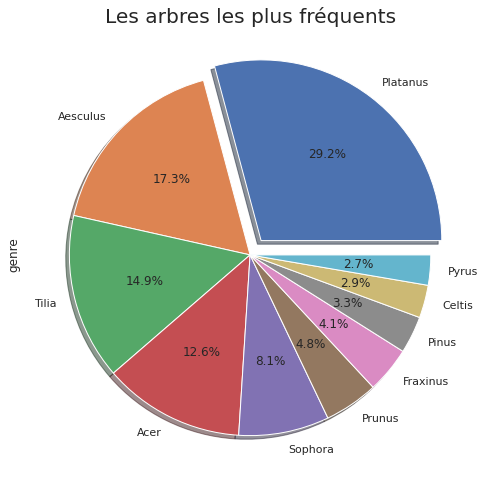

In [159]:
plt.figure(figsize=(15,7))
explode=[0.1,0,0,0,0,0,0,0,0,0]
data.genre.value_counts().iloc[:10].plot.pie(explode=explode,shadow=True,autopct='%1.1f%%')

plt.style.use("fivethirtyeight")
plt.title("Les arbres les plus fréquents")
plt.tight_layout()

**Conclusion** :

Le Platane est de loin l'espèce la plus répandue dans le paysage parisien.

#### 3.2.2 Localisation des arbres

Vérifions à présent comment la population est répartie par domanialité. Pour cela, nous allons nous appuyer sur les variables `domanialite` et `arrondissement` :

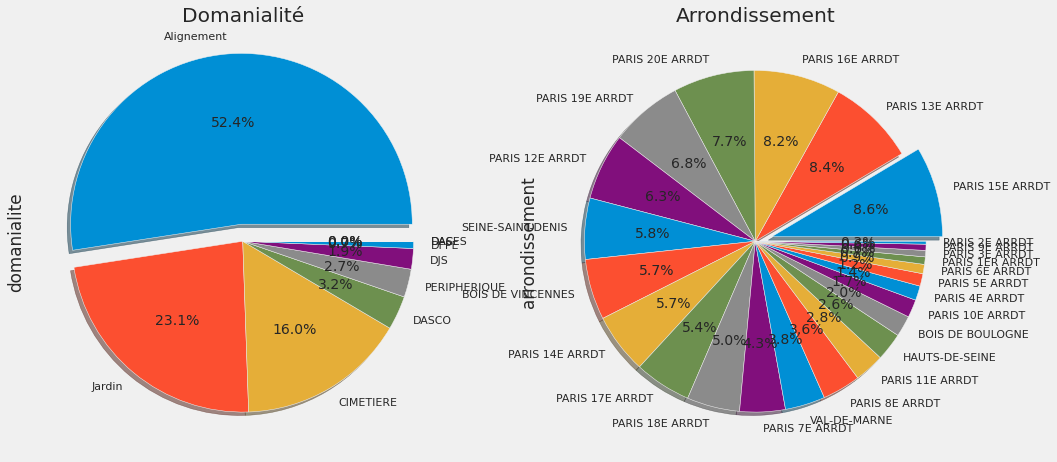

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
#fig.suptitle('Diversité par domanialité', fontsize='x-large')

explode1=[0.1,0,0,0,0,0,0,0,0]
explode2=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

data['domanialite'].value_counts().plot.pie(ax=ax1,explode=explode1,shadow=True,autopct='%1.1f%%')
data['arrondissement'].value_counts().plot.pie(ax=ax2,explode=explode2,shadow=True,autopct='%1.1f%%')

ax1.set_title("Domanialité")
ax2.set_title("Arrondissement")
plt.style.use("bmh")

**Conclusion**

Plus de la moitié des arbres se situent le long des rues. 
Nous remarquons également que certains arrondissements sont moins arborés que d'autres. Points à évoquer plus loin.

#### 3.2.3 Le stade de développement

Vérifions à présent quel est l'âge des individus présents dans le parc arboricole parisien :

In [161]:
data['stade_developpement'].value_counts(normalize=True)

A               0.487244
JA              0.236987
J               0.200845
M               0.074919
Non spécifié    0.000005
Name: stade_developpement, dtype: float64

**Conclusions :**

* Les arbres adultes sont les plus nombreux et constituent presque 50% de paysage.
* Les arbres jeunes et jeunes adultes se situent un peu au dessus des 20%.
* Seulement 7% d'arbres matures.

Essayons de visualiser la répartition des arbres par arrondissement en fonction de leur âge :

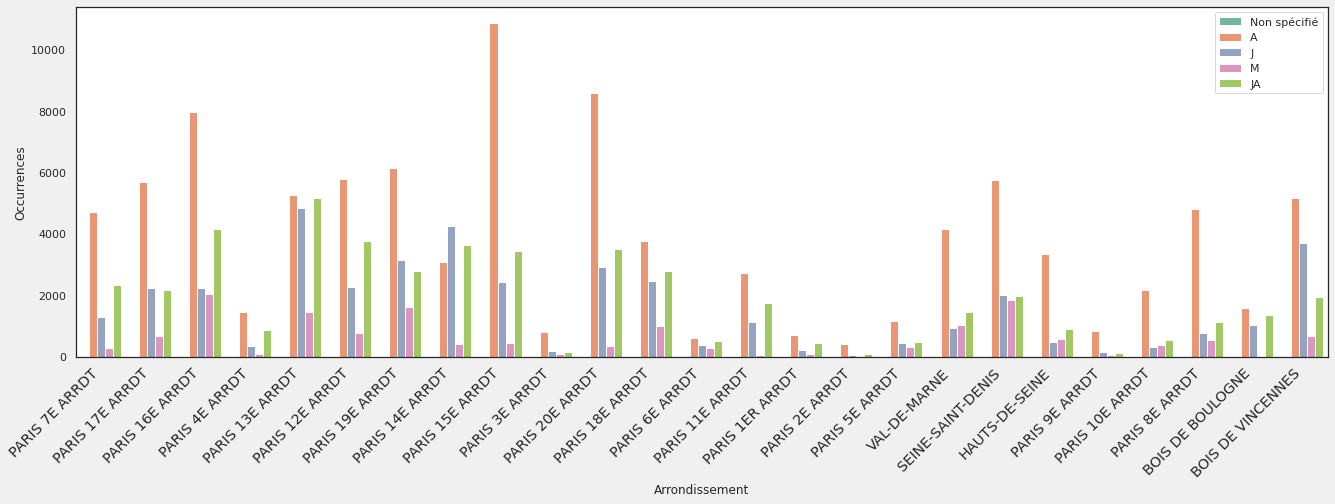

In [162]:
plt.figure(figsize=(20,6))
sns.set_theme(style="white")
g = sns.countplot(x='arrondissement',
                hue='stade_developpement',
                data=data,
                palette='Set2')
g.set_xticklabels(
    g.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
plt.xlabel('Arrondissement')
plt.ylabel('Occurrences')
plt.legend(loc='upper right')

Voyons maintenant quel âge ont atteint les arbres en fonction du genre :

Text(0.5, 1.0, "Ages atteints par la population d'un arbre")

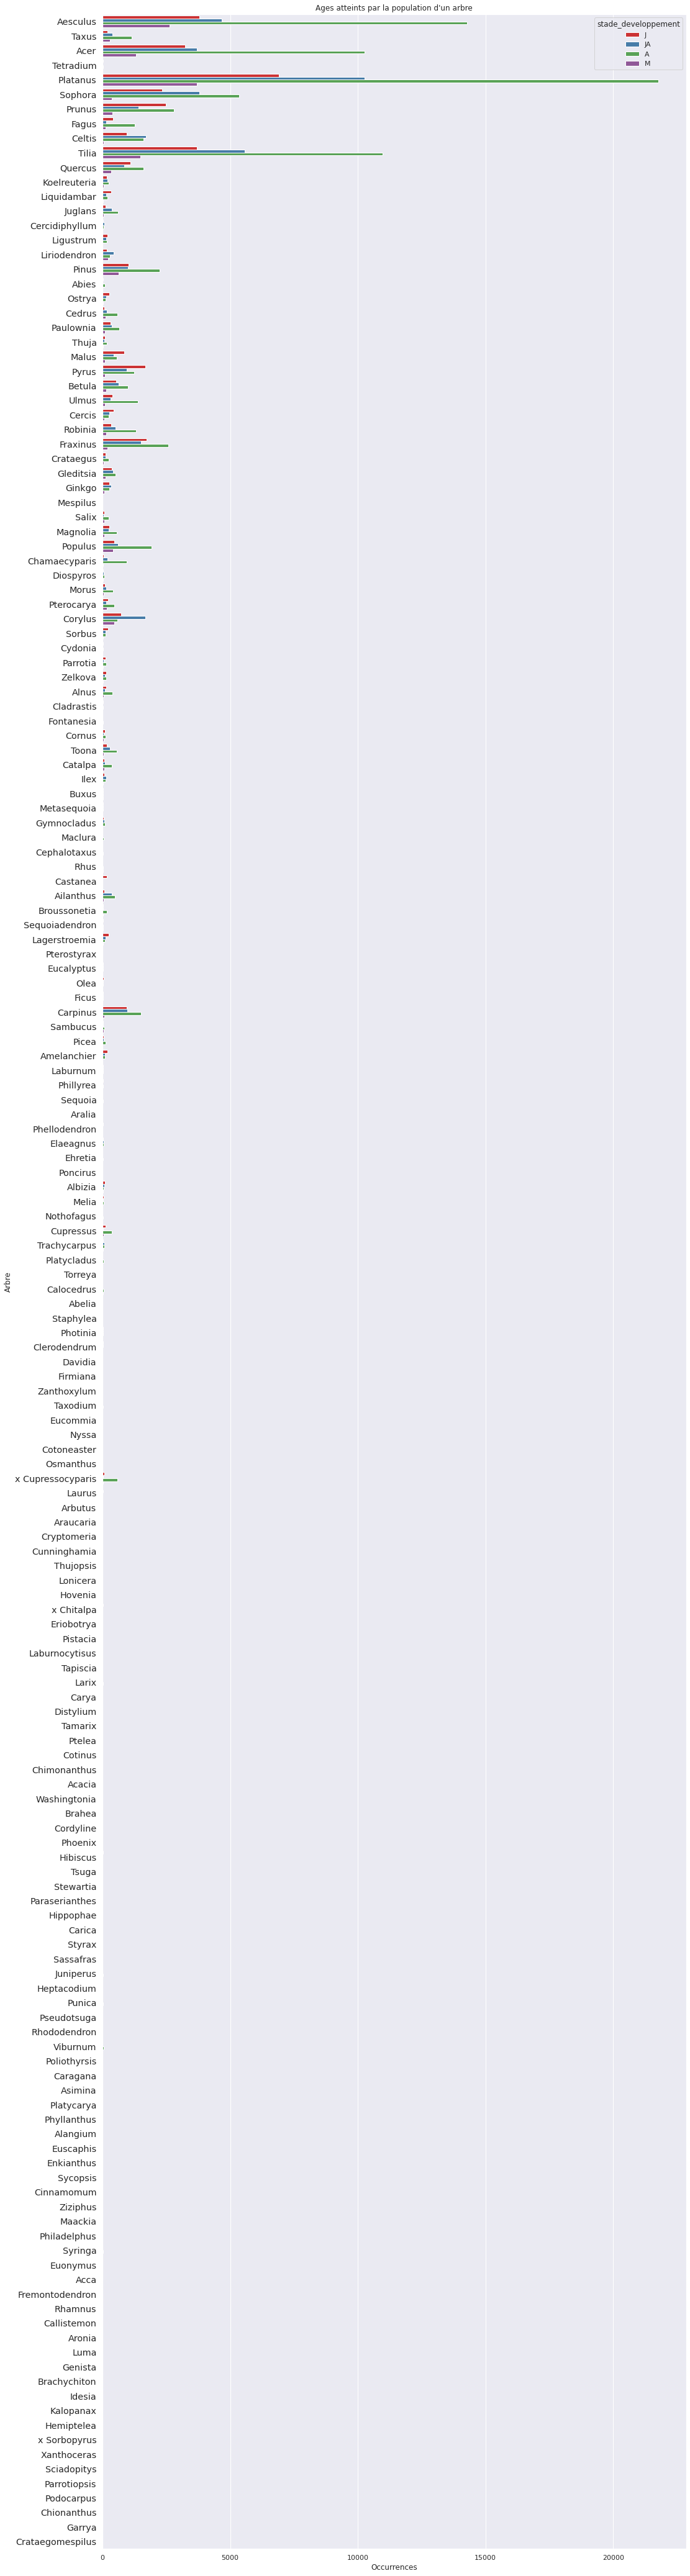

In [163]:
plt.figure(figsize=(15,70))
sns.set_theme(style="darkgrid")
g = sns.countplot(
                y='genre',
                hue='stade_developpement',
                hue_order=['J','JA','A','M'],
                data=data,
                palette='Set1')
g.set_yticklabels(
    g.get_yticklabels(), 
    #rotation=20, 
    #horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
plt.xlabel('Occurrences')
plt.ylabel('Arbre')
plt.title('Ages atteints par la population d\'un arbre')
#plt.legend(loc='upper right')

**Conclusion** :
    
Les Platanes sont non seulement les arbres les plus nombreux, mais en plus la grande majorité a atteint l'âge adulte.

### 3.2.2 Analyse de fond

**3.2.2.1 Détecter les arbres en fonction de leur âge**

Les arbres qui nécessitent une attention plus particulière sont ceux **matures et adultes** (détection d'individus morts, dépéris ou dangereux). Il est important également de prendre soin des arbres **jeunes**.

Essayons de les localiser à l'aide d'une heatmap.

Text(34.099999999999994, 0.5, 'Arrondissement')

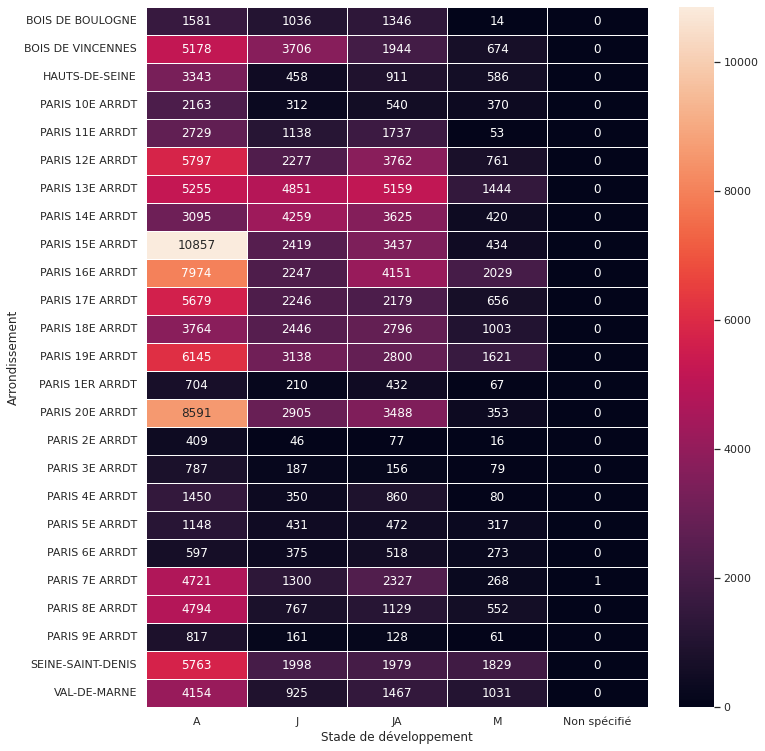

In [164]:
plt.figure(figsize=(10,12))
sns.heatmap(pd.crosstab(data['arrondissement'],data['stade_developpement']),
            annot=True,
            linewidth=1,
            fmt='d')
plt.xlabel('Stade de développement')
plt.ylabel('Arrondissement')

**Conclusion**

Les arbres jeunes se trouvent principalement dans les arrondissements suivants :
- PARIS 13E ARRDT
- PARIS 14E ARRDT
- PARIS 19E ARRDT
- BOIS DE VINCENNES

Les arbres matures :
- PARIS 16E ARRDT
- SEINE-SAINT-DENIS
- PARIS 19E ARRDT
- PARIS 13E ARRDT

Les arbres adultes :
- PARIS 15E ARRDT
- PARIS 20E ARRDT
- PARIS 16E ARRDT
- PARIS 19E ARRDT
- PARIS 12E ARRDT
- PARIS 17E ARRDT
- PARIS 13E ARRDT
- BOIS DE VINCENNES
- SEINE-SAINT-DENIS

#### 3.2.2.7 Une majorité d'arbres d'alignement

Vérifions à présent comment se situent les arbres selon la catégorie `domanialite`.

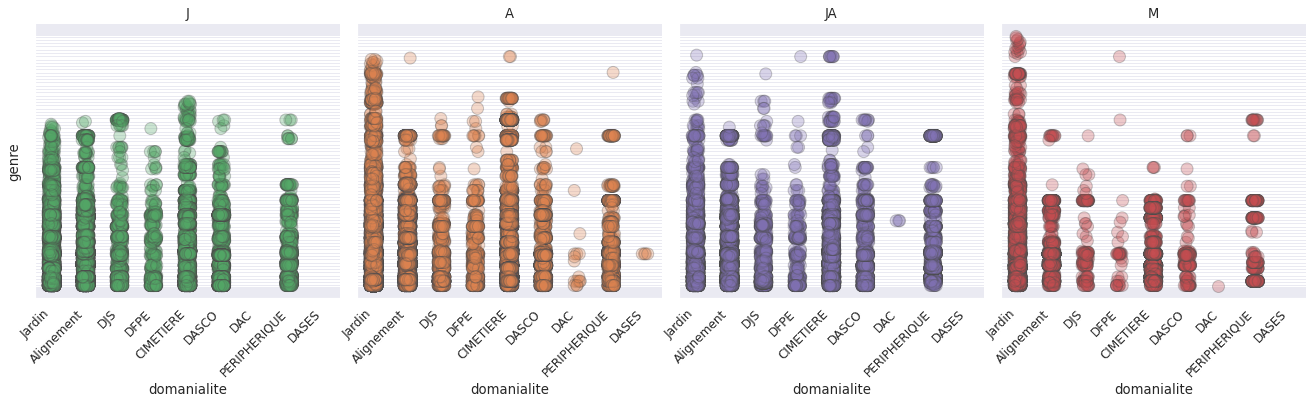

In [165]:
sns.set(style='darkgrid', font_scale=1.1)
g=sns.catplot(y='genre', x='domanialite', 
            hue='stade_developpement', 
            col_order=['J','A','JA','M'],
            #kind='strip',
            alpha=0.3,
            s=12,
            linewidth=1,
            data=data,
            col='stade_developpement')
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set_yticklabels(rotation=45, horizontalalignment='right')

Pour information :
* DASCO	- Ecoles
* DJS	- Equipements sportifs
* DFPE	- Crèches
* DAC	- Equipements culturels
* DASES	- Action sociale

Plusieurs conclusions issues du graphique ci-dessus :
1. Les arbres matures se trouvent surtout dans les **jardins publics**. Idem pour les arbres adultes.
2. Presque pas d'arbres présents dans les **DAC & les DASES**.
3. Beaucoup d'arbres jeunes et adultes dans les **cimetières**. 

Regardons de plus près les arbres d'alignement.

In [166]:
by_domain = data[
    (data["domanialite"] == "Alignement")]
by_domain

by_domain.groupby('lieu')['domanialite'].count().sort_values(ascending=False).iloc[:20]

lieu
AVENUE DES CHAMPS ELYSEES       1246
AVENUE DAUMESNIL                1100
ROUTE DE LA PYRAMIDE            1043
BOULEVARD ARAGO                  895
ESPLANADE DES INVALIDES          891
ALLEE DE LA REINE MARGUERITE     840
BOULEVARD AUGUSTE BLANQUI        805
RUE DE TOLBIAC                   713
ALLEE DE LONGCHAMP               682
BOULEVARD DE L HOPITAL           673
BOULEVARD RASPAIL                665
RUE D ALESIA                     657
AVENUE DE SUFFREN                599
RUE DES PYRENEES                 593
ALLEE DES FORTIFICATIONS         591
BOULEVARD DE MAGENTA             578
AVENUE GAMBETTA                  575
RUE ORDENER                      575
BOULEVARD VOLTAIRE               571
RUE DE LA CONVENTION             552
Name: domanialite, dtype: int64

**Conclusion**: 

Voici les avenues les arbres d’alignement comptent plus de 1000 individus :
* AVENUE DES CHAMPS ELYSEES       1246
* AVENUE DAUMESNIL                1100
* ROUTE DE LA PYRAMIDE            1043

#### 3.2.2.3 Les arbres remarquables

In [167]:
pd.crosstab(data['remarquable'],data['stade_developpement'])

stade_developpement      A      J     JA      M  Non spécifié
remarquable                                                  
False                97082  40120  47394  13431             1
True                   413     68     26   1560             0

In [168]:
by_remarq=data[data['remarquable']=='True']
by_remarq.shape

(2067, 13)

<AxesSubplot:xlabel='remarquable'>

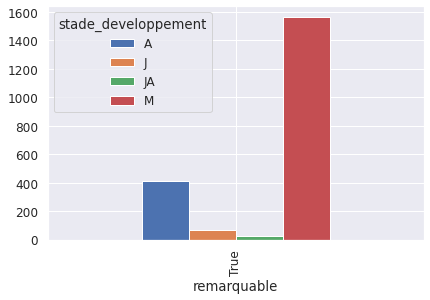

In [169]:
pd.crosstab(by_remarq['remarquable'],by_remarq['stade_developpement']).plot(kind='bar')

**Conclusion:**

Nous avons un total de 2067 arbres remarquables dont : 
* 1560 arbres matures
* 413 arbres à l'âge adulte
* 68 arbres jeunes 
* 26 arbres jeunes / adultes

#### 3.2.2.4 Les arbres très hauts

In [170]:
by_hauteur = data[
    (data["hauteur_m"] >=25)]
by_hauteur

by_hauteur.groupby('genre')['hauteur_m'].count().sort_values(ascending=False).iloc[:30]

genre
Platanus          1905
Aesculus           483
Populus            171
Quercus             83
Acer                43
Pterocarya          36
Cedrus              34
Tilia               27
Sophora             25
Pinus               17
Fraxinus            12
Ulmus                9
Robinia              9
Sequoiadendron       8
Salix                6
Gleditsia            5
Fagus                5
Ginkgo               4
Corylus              4
Juglans              4
Sequoia              4
Liriodendron         3
Malus                2
Paulownia            2
Ailanthus            1
Toona                1
Calocedrus           1
Taxodium             1
Albizia              1
Pyrus                1
Name: hauteur_m, dtype: int64

**Conclusion** :

Voici les espèces les plus hautes :
* Platanus - 1905
* Aesculus - 483
* Populus - 171
* Quercus - 83

Localisons les arbres dont la hauteur dépasse les 25 mètres :

Text(-9.220000000000006, 0.5, 'Arrondissement')

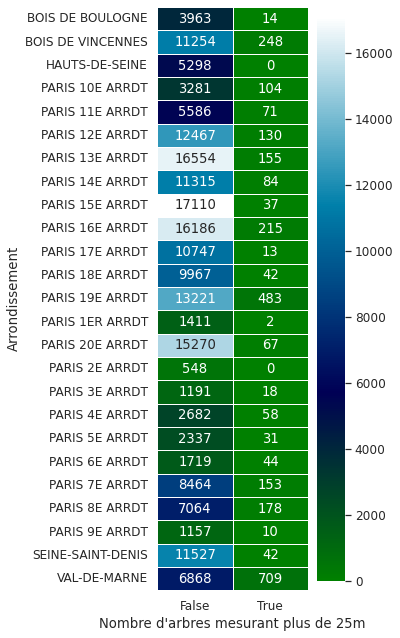

In [171]:
plt.figure(figsize=(3,10))
sns.heatmap(pd.crosstab(data['arrondissement'],data['hauteur_m']>=25), 
            annot=True,
            cmap='ocean',
            linewidth=1,
            fmt='d')
plt.xlabel('Nombre d\'arbres mesurant plus de 25m')
plt.ylabel('Arrondissement')

**Conclusion :**

La localisation des arbres qui mesurent plus de 25 mètres de haut :

* VAL-DE-MARNE - 709 individus !
* PARIS 19E ARRDT - 483 individus
* BOIS DE VINCENNES - 248 individus
* PARIS 16E ARRDT - 215 individus

#### 3.2.2.5 Les arbres très larges en termes de circonférence

In [172]:
by_circ = data[
    (data["circonference_cm"] >=500)]
by_circ

by_circ.groupby('genre')['circonference_cm'].count().sort_values(ascending=False).iloc[:30]

genre
Platanus          40
Aesculus           3
Sequoiadendron     3
Pterocarya         2
Tilia              2
Acer               1
Celtis             1
Eucalyptus         1
Fagus              1
Juglans            1
Parrotia           1
Prunus             1
Thuja              1
Trachycarpus       1
Zelkova            1
Name: circonference_cm, dtype: int64

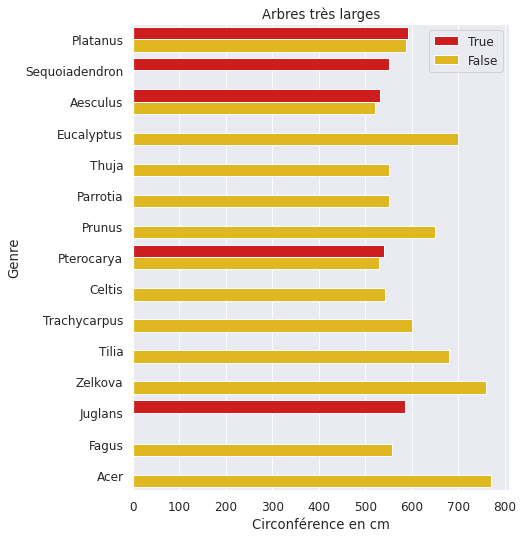

In [173]:
echantillon_circ_max=data[data['circonference_cm']>500]

plt.figure(figsize=(6,8))
#sns.set_style="white"

sns.barplot(y='genre',
            x='circonference_cm',
            data=echantillon_circ_max,
            hue='remarquable',
            ci=None,
            palette='hot')

plt.title("Arbres très larges")
plt.xlabel('Circonférence en cm')
plt.ylabel('Genre')
plt.legend()

**Conclusion**

Le graphique ci-dessus présente les espèces se caractérisant par une circonférence supérieure à 500 cm. De plus, les barres rouges indiquent les espèces notées 'remarquables'.

#### 3.2.2.6 Des quartiers moins arborés que d'autres

In [174]:
data.groupby('arrondissement')['genre'].count().sort_values(ascending=False)

arrondissement
PARIS 15E ARRDT      17147
PARIS 13E ARRDT      16709
PARIS 16E ARRDT      16401
PARIS 20E ARRDT      15337
PARIS 19E ARRDT      13704
PARIS 12E ARRDT      12597
SEINE-SAINT-DENIS    11569
BOIS DE VINCENNES    11502
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10760
PARIS 18E ARRDT      10009
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7577
PARIS 8E ARRDT        7242
PARIS 11E ARRDT       5657
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3977
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1763
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: genre, dtype: int64

**Conclusion** :
Les quartiers suivants nécessitent peut-être des actions supplémentaires afin de procéder à des plantations ?

* Les quartiers avec moins de 2000 arbres :
    * PARIS 6E ARRDT - 1764
    * PARIS 1ER ARRDT - 1413
    * PARIS 3E ARRDT - 1209
    * PARIS 9E ARRDT - 1167
    
* Attention, au PARIS 2E ARRDT - seulement 548 arbres !

Etudions les espaces verts présents dans chaque arrondissement :

Text(-80.869, 0.5, 'Genre')

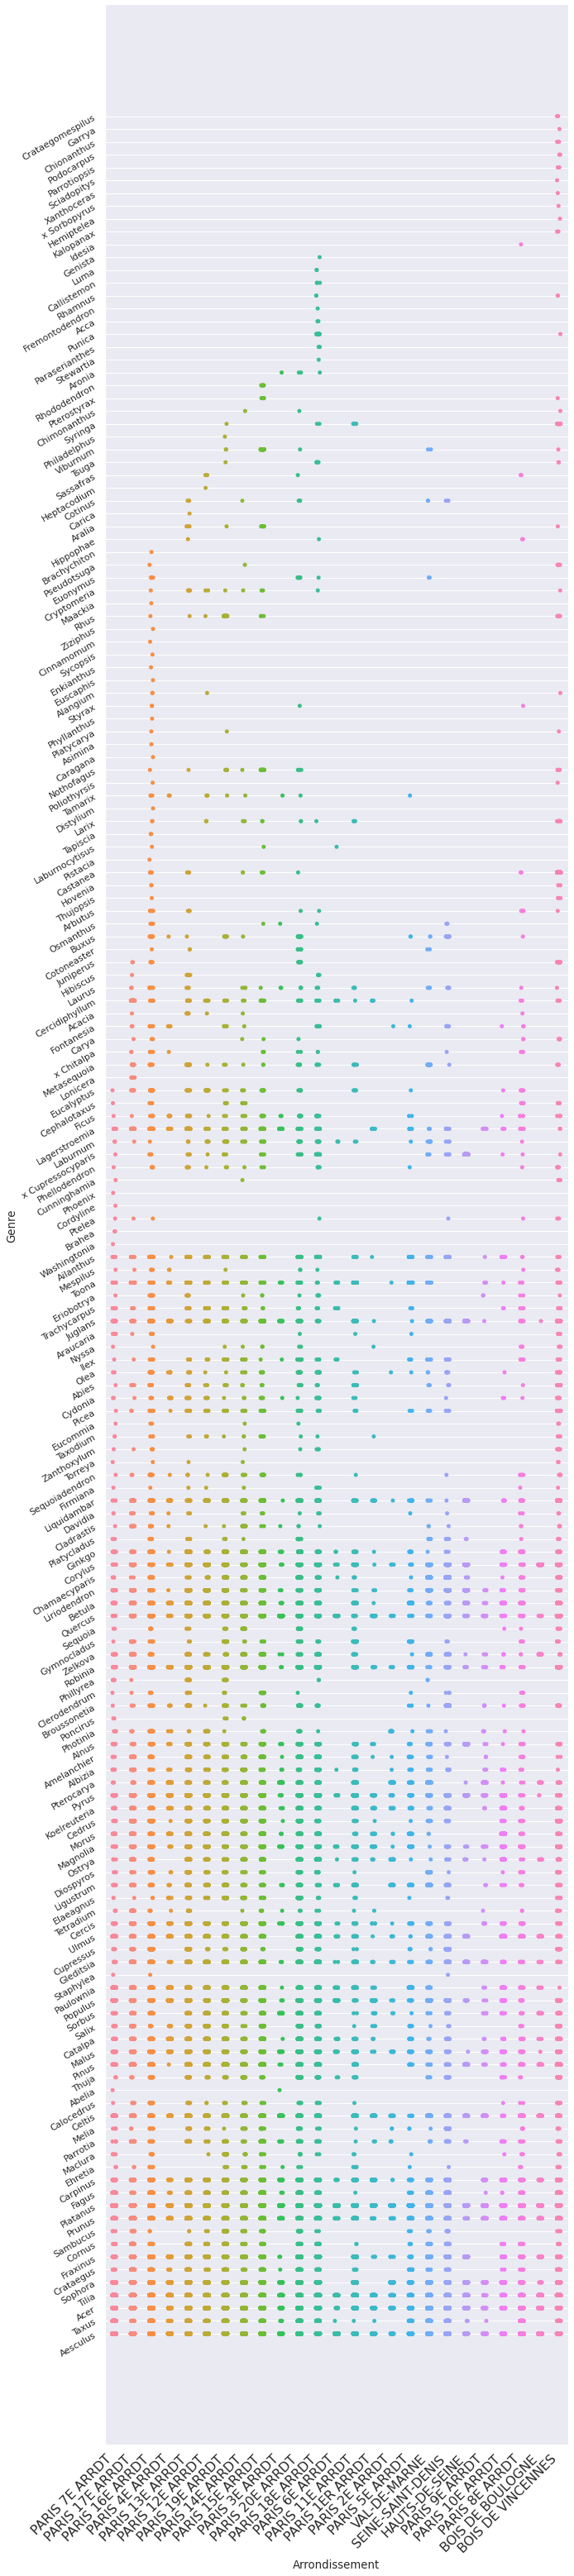

In [175]:
g=sns.catplot(data=data,x="arrondissement",y="genre")

g.set_xticklabels(
    rotation=45, 
    horizontalalignment='right',
    #fontweight='light',
    fontsize='large'
)
g.set_yticklabels(
    rotation=30, 
    horizontalalignment='right',
    #fontweight='light',
    fontsize='small'
)
g.fig.set_figwidth(20.27)
g.fig.set_figheight(50.7)

plt.xlabel('Arrondissement')
plt.ylabel('Genre')

Le graphique ci-dessus permet de corréler les espèces par arrondissement : 
- les espèces qui poussent dans un seul arrondissement (Phoenix, Washingtonia, Thujopsis, Idesia etc) 
- les espèces présentes partout (Quercus, Pyrus, Tillia, Gleditsia, Malus etc)
- les arrondissements très variés en espèces (Bois de Vincennes, Paris XVIe)
- les arrondissements très homogènes en espèces (Paris IIe, Paris VIe)

## Synthèse de l’analyse de données. Conclusions.

L'analyse du dataset a permis d'examiner les données et de jeter de la lumière sur les sujets pertinents de l'entretien du parc arboricole parisien.

La synthèse est organisée autour de quatre grands sujets :
1. Les espèces
2. La localisation des arbres
3. L'âge
4. Le développement

### 1. Les espèces

#### *====> L'espèce qu'on voit le plus à Paris, c'est **le Platane**.*

Plus résistante que d'autres espèces, celle-ci n'en est pas moins exposée à certaines maladies. Il en est une particulièrement virulente : **l'anthracnose du platane**. Elle est due à la présence d'un champignon pathogène de la famille des Sphericeae, le Gnomonia vegeta.

#### *====> En deuxième position se place **le Marronnier**.*

Le marronnier est un superbe arbre qui s’impose de façon majestueuse au sein des parcs et des vastes jardins. Toutefois, il est relativement fragile et sensible à des maladies spécifiques. L’impression de brûlure de ses feuilles peut correspondre **au chancre bactérien du marronnier**, à la mineuse du marronnier ou à la sécheresse estivale.

#### *====> **Le Tilleul** occupe la troisième position.*
Si le tilleul est un arbre robuste, il peut être infesté par des parasites ou infecté par **des maladies cryptogamiques.**

Les maladies mentionnées ci-dessus font de gros dégâts étant donné qu’elles se transmettent facilement.

Par conséquent, il faut veiller aux signes avant coureurs de maladie, car la **dissémination du champignon ou bactéries d'arbre en arbre est extrême, entraînant une contamination importante.**



### 2. La localisation
#### *====> Stade de développement par domanialité*.

* Les arbres matures se trouvent surtout dans les **jardins publics**. Idem pour les arbres adultes.
* Presque pas d'arbres présents dans les **DAC & les DASES**.
* Beaucoup d'arbres jeunes et adultes **dans les cimetières**.

Question : pourquoi un manque de plantations aussi flagrant dans les DAC et DASES ? Faut-il prévoir des actions ?


#### *====> Plus de la moitié sont des arbres d'alignement.*

Les arbres d'alignement risquent de subir des **dégradations importantes** causées par le trafic.

Cela signifie que les agents sylvicoles sont amenés à entreprendre de **multiples actions d'entretien**, dont les arbres situés dans les jardins ou les cimetières n'ont pas besoin : 
-    un risque plus élevé d'être blessés (au niveau des racines, du tronc ou du houppier)
-    de subir des actes de vandalisme, des accidents de la circulation, des déversements de substances polluantes au pied de l’arbre
-    de décliner s’ils constituent un danger

Un élagage régulier, l'enlèvement d'un arbre heurté ou abîmé, la protection des racines - cela nécessite des déplacements supplémentaires.

Voici les voieries accompagnées d'un grand nombre d'arbres d'alignement :

* AVENUE DES CHAMPS ELYSEES => 1246
* AVENUE DAUMESNIL => 1101
* ROUTE DE LA PYRAMIDE => 1043
* BOULEVARD ARAGO => 895
* ESPLANADE DES INVALIDES => 891
* ALLEE DE LA REINE MARGUERITE => 840
* BOULEVARD AUGUSTE BLANQUI => 805

#### *====> Certains arrondissements sont moins arborés que d'autres.*

Dans les quartiers listés ci-dessous il y a **moins de 2000 arbres**. Il serait peut-être intéressant d'entreprendre des actions afin de procéder à des plantations :

* PARIS 6E ARRDT - 1764 individus
* PARIS 1ER ARRDT - 1413 individus
* PARIS 3E ARRDT - 1209 individus
* PARIS 9E ARRDT - 1167 individus

Une attention particulière au 2E ARRDT qui est **le plus pauvre en arbres** - seulement 548 individus.

### 3. L'âge

#### *====> Les arbres adultes sont les plus nombreux et constituent presque 50% du paysage.*

À l’âge adulte, l’arbre doit être **élagué régulièrement** pour pouvoir cohabiter avec son environnement. 

Cela signifie des passages réguliers afin de **veiller au bon état du patrimoine arboré** tout en détectant les arbres qui **nécessitent des soins particuliers** : le maintien d’une bonne distance entre l’arbre et les façades, relevage des branches basses pour la circulation routière et les piétons, suppression de bois mort et de branches dépérissantes.

* Les **arbres adultes** sont les plus répandus dans les arrondissements suivants (entre 5K et presque 11K individus) :

* PARIS 15E ARRDT
* PARIS 20E ARRDT
* PARIS 16E ARRDT
* PARIS 19E ARRDT
* PARIS 12E ARRDT
* PARIS 17E ARRDT
* PARIS 13E ARRDT
* BOIS DE VINCENNES
* SEINE-SAINT-DENIS


* Les **arbres matures** (entre 1400 et 2K individus) :

* PARIS 16E ARRDT
* SEINE-SAINT-DENIS
* PARIS 19E ARRDT
* PARIS 13E ARRDT

Les arbres jeunes, à leur tour, doivent être arrosés régulièrement. De plus, l'installation d'un tuteur pour assurer une bonne stabilité et des tailles de formation doivent être réalisées.

* Les **arbres jeunes** se trouvent principalement dans les arrondissements suivants (entre 3K et 5K individus):

* PARIS 13E ARRDT
* PARIS 14E ARRDT
* PARIS 19E ARRDT
* BOIS DE VINCENNES


#### *====> Les Platanes sont non seulement les arbres les plus nombreux, mais en plus ln grande majorité a atteint l'âge adulte.*

Cette information permet d’optimiser les achats et le stockage du matériel et des produits adaptés spécifiquement à l’entretien de ces arbres.


### 4. Le développement

#### *====> Arbres remarquables*
Dans la région parisienne nous avons un total de 2067 arbres remarquables dont : 
* 1560 arbres matures
* 413 arbres à l'âge adulte
* 68 arbres jeunes 
* 26 arbres jeunes / adultes


Les arbres matures mais également ceux jeunes nécessitent des soins particuliers et sont à surveiller de plus près (cf le point *3. L'âge*).


#### *====> Arbres très hauts*

Voici les individus les plus hauts (plus de 25 m) :
* Platanus - 1905 individus 
* Aesculus -  483 individus 
* Populus -   171 individus 
* Quercus -    83 individus 
* Acer -    43 individus

Plus un arbre est grand, plus il nécessitera de techniciens, de temps, de matériel, d’arrosage et de
produits pour son entretien (des difficultés d'accès pour un élagage).

Ci-dessous les endroits où se trouve plus de 1000 arbres mesurant plus de 25 mètres de haut :

* PARIS 19E ARRDT
* BOIS DE VINCENNES
* PARIS 16E ARRDT
* VAL-DE-MARNE

#### *====> Arbres très larges* 

Ci-dessous les espèces se caractérisant par une circonférence supérieure à 500 cm : 
* Platanus - 40 individus
* Aesculus - 3 individus
* Sequoiadendron - 3 individus
* Pterocarya - 2 individus
* Tilia - 2 individus

Par conséquent, il est important de prévoir une équipe ainsi qu'un matériel spécifique adapté à l'arrosage d'un arbre aussi large.



## 